**Customer Segmentation**

The most successful companies today are the one's who know their customers so well that they are able to anticipate their needs beforehand. This can better be achieved if we can segment the customers into different groups that reflect the similarities among the customers in each group. The goal of the segmentation is to foresee the needs of customers, get to know their interests, lifestyles, priorities and learn their spending habits so that to maximize the value of customers to the business.

In this Notebook, I have included the following:

**1. Data Preparation**

* Missing Values
* Removing Outliers

**2. Feature Engineering**

* Age of Customers
* Days Since Enrollment
* Total Spendings
* Number of Children
* Marital Status
* Education
* Removing Outliers

**3. Exploratory Data Analysis**

* Marital Status
* Average Spendings: Marital Status Wise
* Education Level
* Child Status
* Average Spendings: Child Status Wise
* Age Distribution of Customers
* Relationship: Age vs Spendings
* Customers Segmentation: Age Group Wise
* Average Spendings: Age Group Wise
* Income Distribution of Customers
* Relationship: Income vs Spendings
* Most Bought Products

**4. Modelling Clusters**

* Optimum Clusters Using Elbow Method
* Dimentionality Reduction
* Clusters Identification
* Data Exploration: Clusters Based
* Customers Distribution
* Relationship: Income vs Spendings
* Spending Habits by Clusters
* Purchasing Habits by Clusters
* Promotions Acceptance by Clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import date
from sklearn.pipeline import Pipeline

**1. Data Preparation**

In [2]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",delimiter='\t')

In [3]:
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [6]:
print(df.describe(exclude=np.number))

         Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12


* Missing Values

In [7]:
print(df.isna().sum())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [8]:
df = df.dropna()

**2. Feature Engineering**

There is a lot of information given in the dataset related to the customers. In some cases we can group some columns together to create new features and in some cases we can create new columns based on the existing one's to create new features. This would help to better explore the data and draw meaningful insights from it.

* Age of Customers

In [9]:
today = date.today()
df['Age'] = today.year - df['Year_Birth']
print(df['Age'].head())

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64


* Days Since Enrollment

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates = []
days = []
for i in df['Dt_Customer']:
    dates.append(i)

In [11]:
for j in dates:
     days.append((max(dates)-j).days)
df['day_customer'] = days
print(df['day_customer'].head())

0    971
1    125
2    472
3     65
4    321
Name: day_customer, dtype: int64


* Total Spendings

In [12]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

* Number of Children

In [13]:
df['Chidlern'] = df['Kidhome'] + df['Teenhome']

* Marital Status

In [14]:
df['living_with'] = df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single': 'Alone',"Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone"})

* Education

In [15]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
print(df.Education.value_counts())

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64


* Removing Outliers

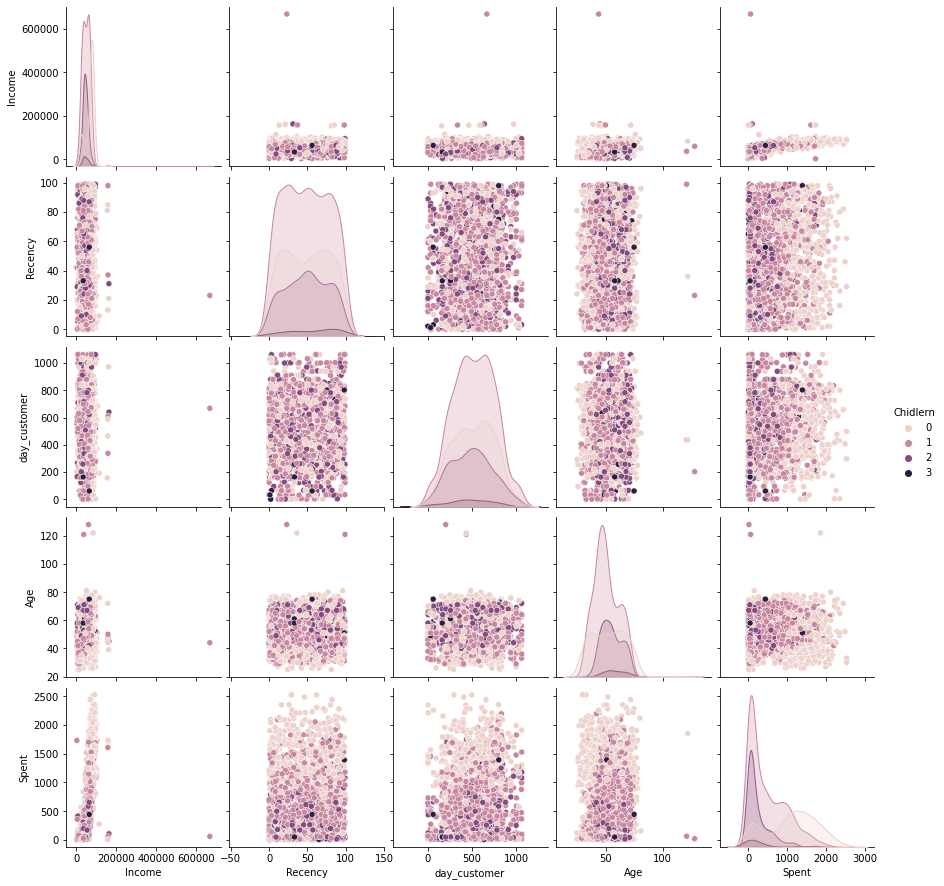

In [16]:
To_Plot = ["Income", "Recency", "day_customer", "Age", "Spent", "Chidlern"]
sns.pairplot(df[To_Plot],hue="Chidlern")
plt.show()

In [17]:
df = df[df['Income']<600000]
df = df[df['Age']<120]
print(df.shape)

(2212, 34)


**3. Exploratory Data Analysis**


* Marital Status
* Education Level
* Child Status

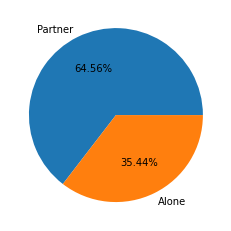

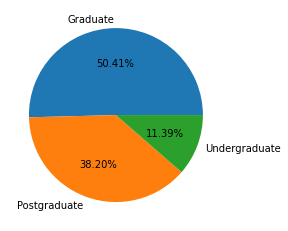

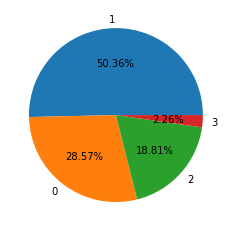

In [18]:
list_for_pie = ['living_with',"Education",'Chidlern']
for i in list_for_pie:
    plt.pie(x=df[i].value_counts(),labels=df[i].value_counts().index,autopct="%.2f%%")
    plt.show()
    

Insights:
* 2/3rd of the customers are living with partners while about 1/3rd are singles
* Half of the customers are University graduates
* There are more customers who hold PhD and Master degrees than the customers who are undergraduate
* About 50% of the customers have only one child
* 28% of the customers do-not have any children at home while 19% of them have 2 children

* Average Spendings: Marital Status Wise

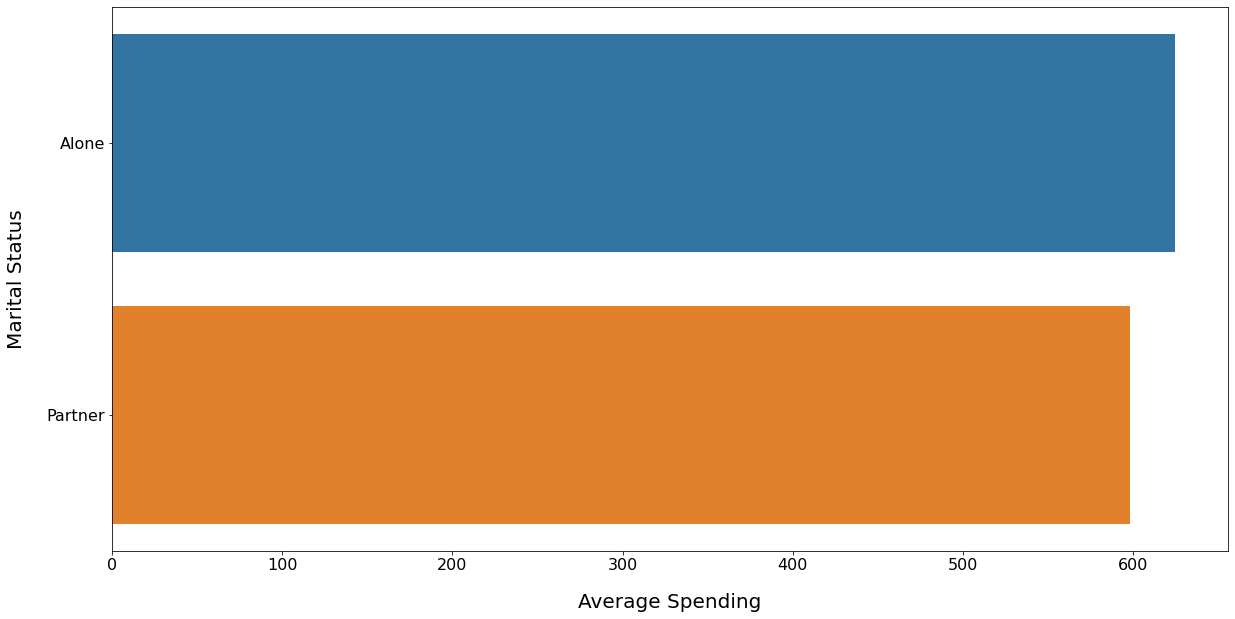

In [19]:
maritalspending = df.groupby('living_with')['Spent'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])
plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df , x='Average Spending', y="Marital Status")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20)
plt.show()

Insights:

Despite being the minority, the Singles spent more money on the average as compared to the customers having partners

* Average Spendings: Child Status Wise

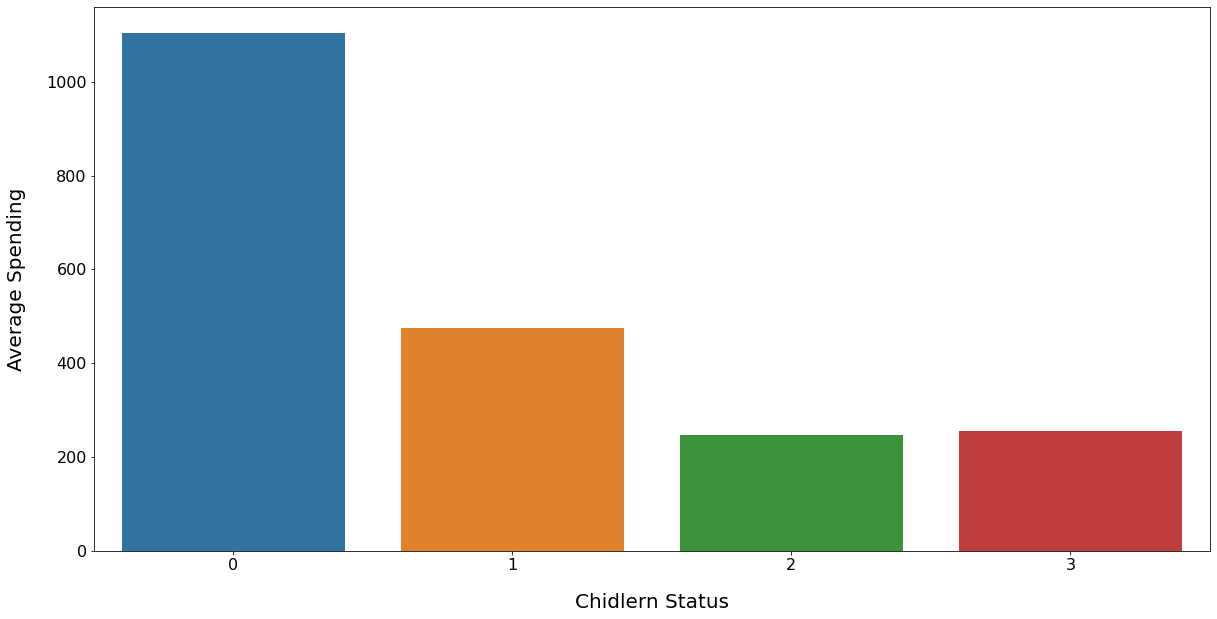

In [20]:
childrenspending = df.groupby('Chidlern')['Spent'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['Chidlern', 'Average Spending'])
plt.figure(figsize=(20,10))
sns.barplot(data = childrenspending_df , x='Chidlern', y='Average Spending')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Chidlern Status', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20)
plt.show()

Insights:

Customers who don't have any children at home spent higher than the customers having 1 children

The customers having 1 children are spending higher than the customers havin 2 and 3 children

* Most Bought Products

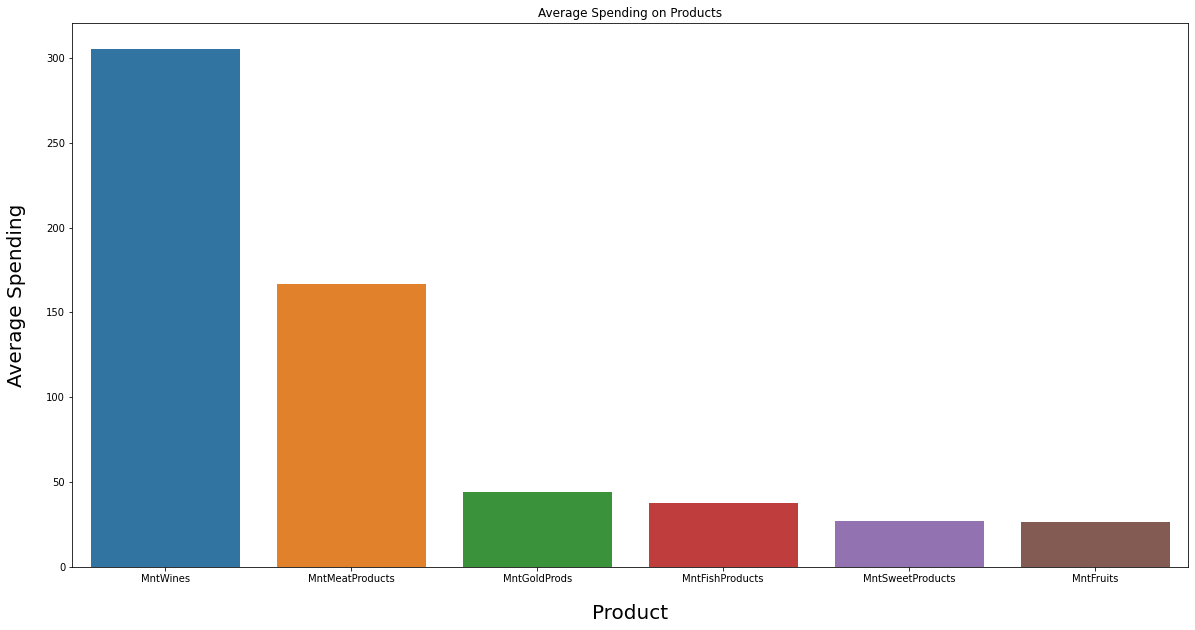

In [21]:
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(20,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Insights:

Wine and Meats products are the most famous products among the customers

Sweets and Fruits are not being purchased often

* Relationship: Income vs Spendings

Text(0.5, 1.0, 'Income vs Spendings')

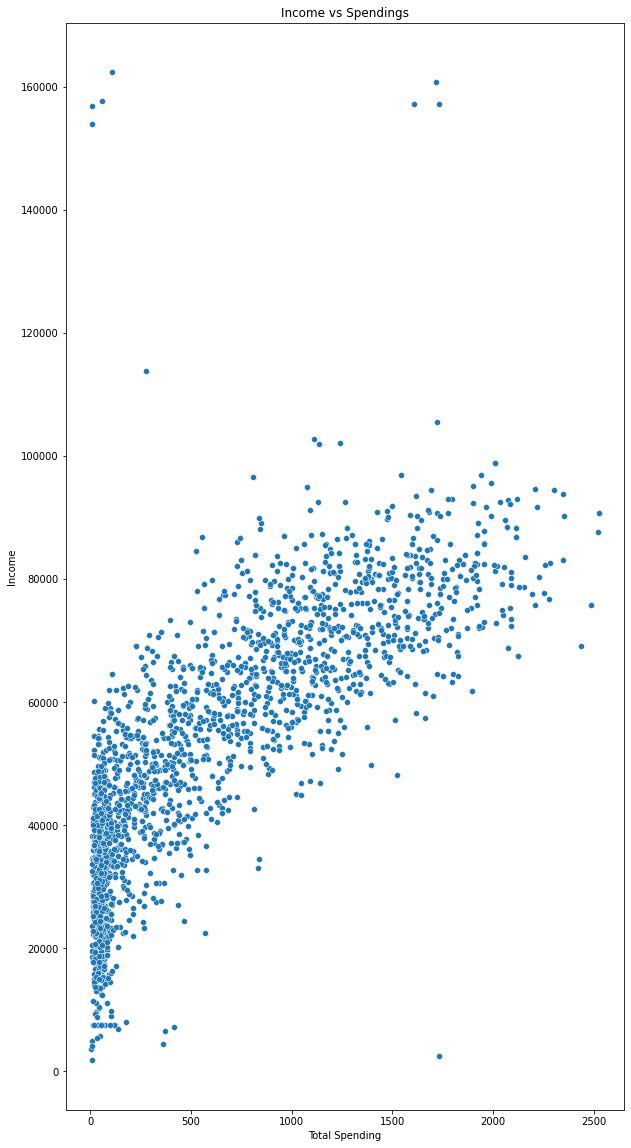

In [22]:
plt.figure(figsize = (10,20))
sns.scatterplot(x='Spent',y='Income',data = df)
plt.xlabel('Total Spending')
plt.ylabel('Income')
plt.title('Income vs Spendings')

Insights:

The relationship is linear. Customers having higher salaries are spending more

* Relationship: Age vs Spendings

Text(0.5, 1.0, 'Age vs Spendings')

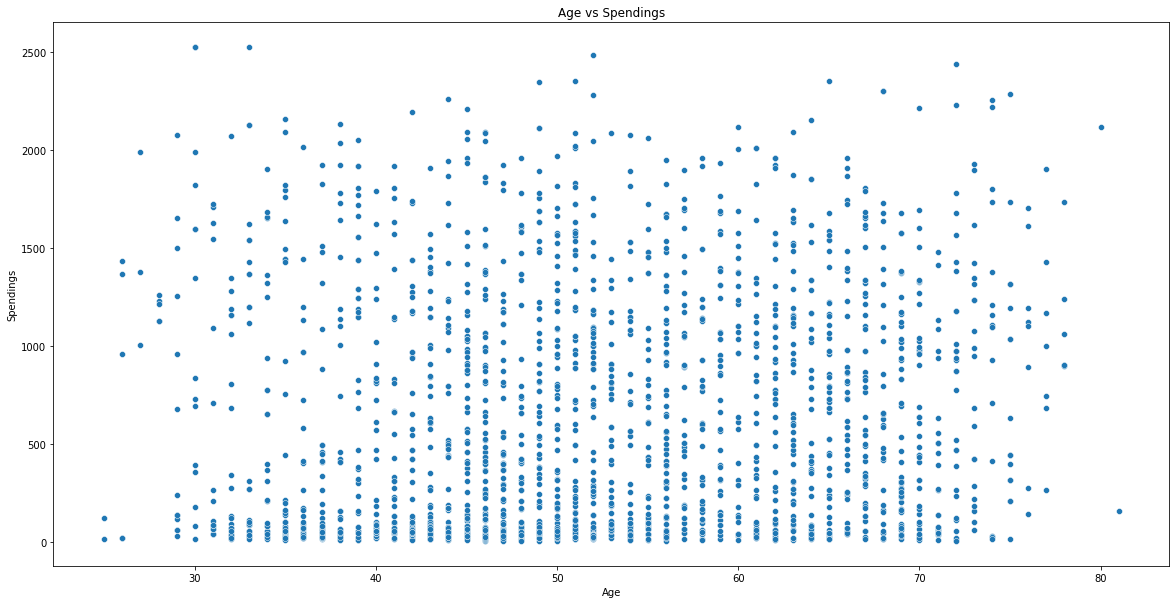

In [23]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Age', y='Spent',data=df )
plt.xlabel('Age')
plt.ylabel('Spendings')
plt.title('Age vs Spendings')

Insights:

There doesn't seem to be any clear relationship between age of customers and their spending habits

* Age Distribution of Customers

Text(0, 0.5, 'Counts')

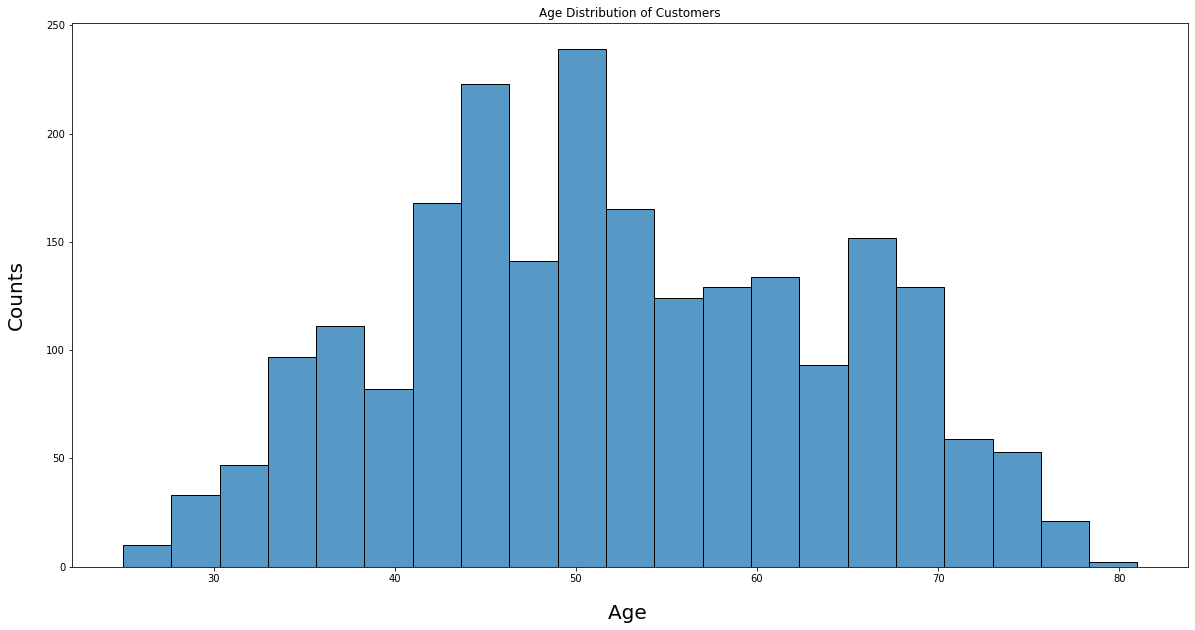

In [24]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x='Age')
plt.title("Age Distribution of Customers")
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

Insights:

Age of the customers is nearly normally distributed, with most of the customers aged between 40 and 60

* Income Distribution of Customers

Text(0, 0.5, 'Counts')

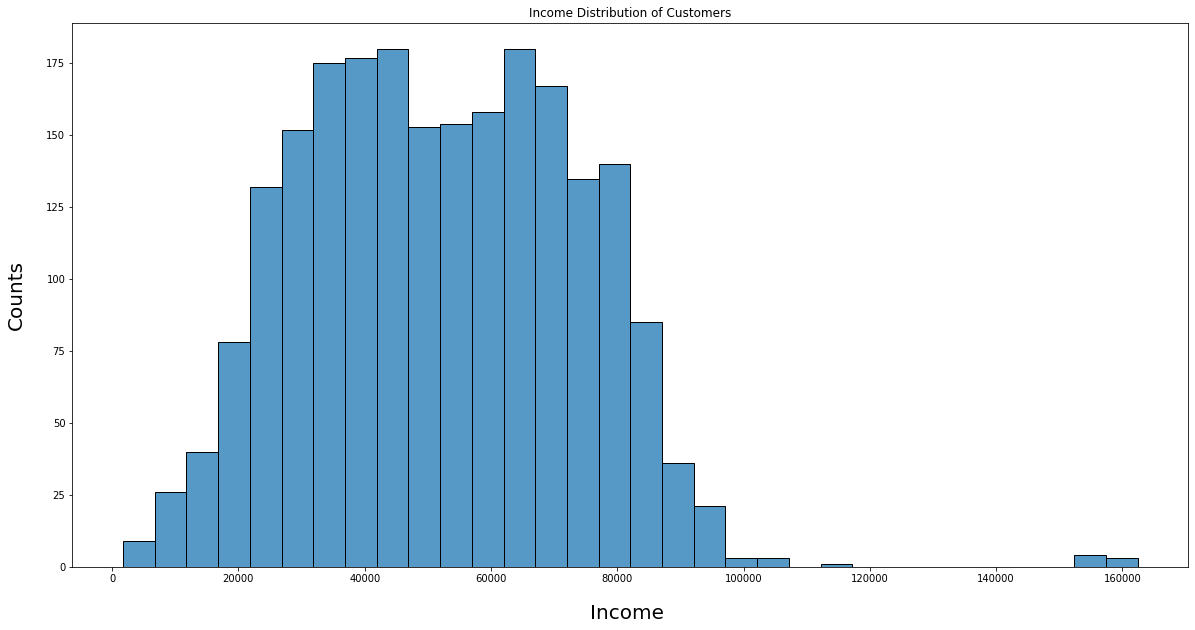

In [25]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x='Income')
plt.title("Income Distribution of Customers")
plt.xlabel('Income ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

Insights:

The salaries of the customers have normal distribution with most of the customers earning between 25000 and 85000

**4. Modelling Clusters**


In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'day_customer', 'Spent', 'Chidlern', 'living_with'],
      dtype='object')

In [27]:
to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue','Response']
           
X = df.drop(to_drop,axis=1)

In [28]:
dummies = pd.get_dummies(X[["Education",'living_with']],drop_first=True,prefix=['Ed','li'])
X = pd.concat([X,dummies],axis=1)

In [29]:
X.drop(["Education",'living_with'],axis=1,inplace=True)
print(X.shape)

(2212, 8)


* Optimum Clusters Using Elbow Method

([<matplotlib.axis.XTick at 0x7f5417431390>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

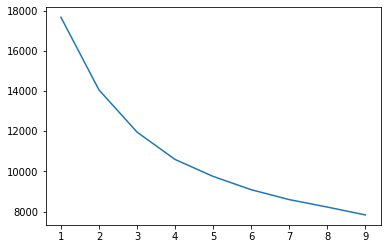

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = range(1,10)
inertias = []
for k in n_clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertias.append(model.inertia_)
    
plt.plot(n_clusters,inertias)
plt.xticks(n_clusters)

[0.27306805 0.45419247 0.58055854 0.70376573 0.81555456 0.9060007
 0.97875738 1.        ]


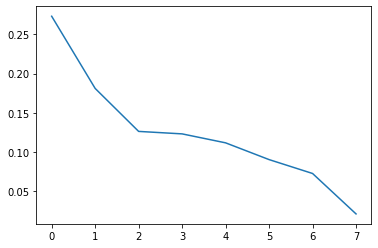

In [31]:
steps = [('scaler',StandardScaler()),('reducer',PCA())]
pipeline = Pipeline(steps)
pipeline.fit(X)
print(pipeline.steps[1][1].explained_variance_ratio_.cumsum())
plt.plot(pipeline.steps[1][1].explained_variance_ratio_)
plt.show()

In [32]:
steps = [('scaler',StandardScaler()),('reducer',PCA(n_components=2))]
pipeline = Pipeline(steps)
X_scaled_pca=pipeline.fit_transform(X)

([<matplotlib.axis.XTick at 0x7f54142bc050>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

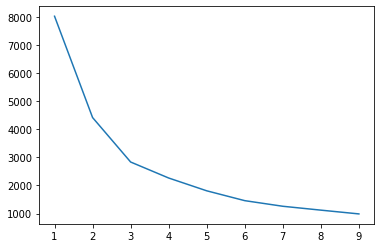

In [33]:
n_clusters = range(1,10)
inertias = []
for k in n_clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled_pca)
    inertias.append(model.inertia_)
    
plt.plot(n_clusters,inertias)
plt.xticks(n_clusters)

Insights:

Based on the above plot we will segment the customers into 4 clusters, as the inertia value donot decrase much after 4 clusters

In [34]:
model = KMeans(n_clusters=4)
model.fit(X_scaled_pca)
labels = model.predict(X_scaled_pca)
df['labels'] = labels

Text(0.5, 1.0, 'The Plot Of The Clusters')

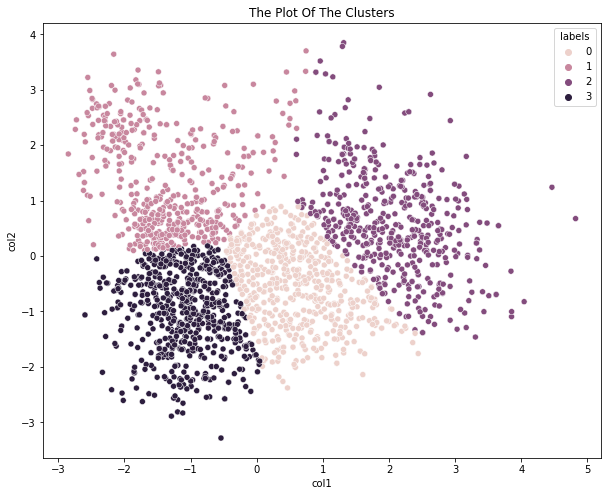

In [35]:
PCA_X = pd.DataFrame(X_scaled_pca, columns=(["col1","col2"]))
PCA_X['labels'] = labels

plt.figure(figsize=(10,8))
sns.scatterplot(x = "col1",y = "col2", hue='labels',data=PCA_X )
plt.title("The Plot Of The Clusters")

* Clusters Identification

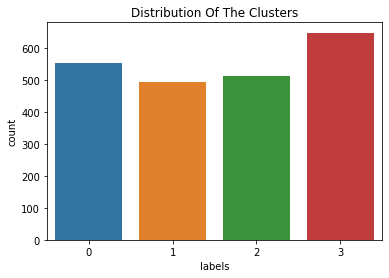

In [36]:
sns.countplot(x=df['labels'])
plt.title("Distribution Of The Clusters")
plt.show()

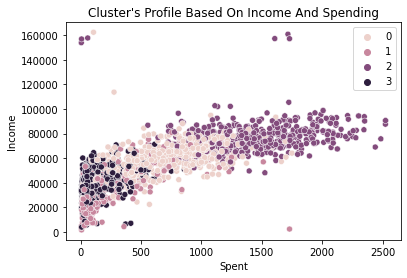

In [37]:
sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["labels"])
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


Income vs spending plot shows the clusters pattern

group 0: low spending & low income

group 1: high spending & average income

group 2: high spending & low income

group 3: high spending & high income

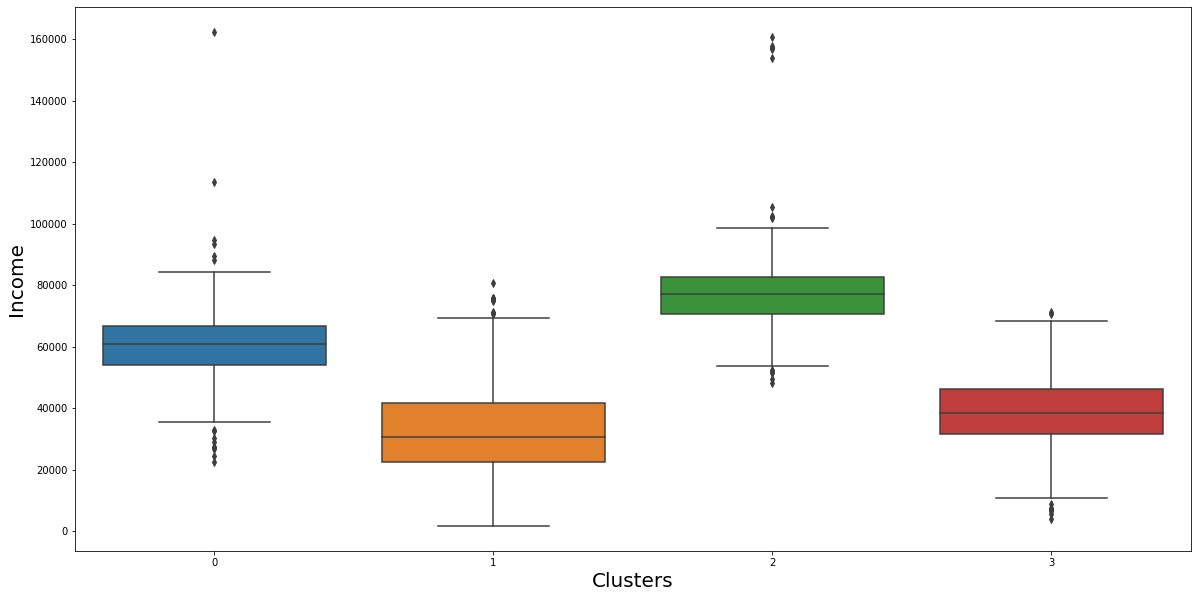

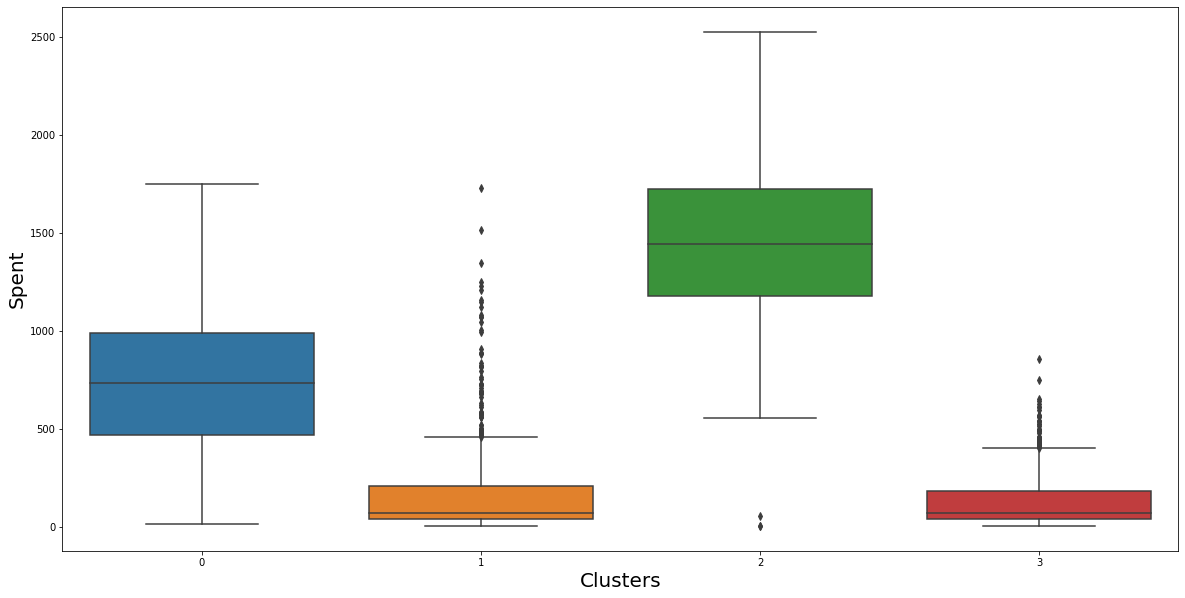

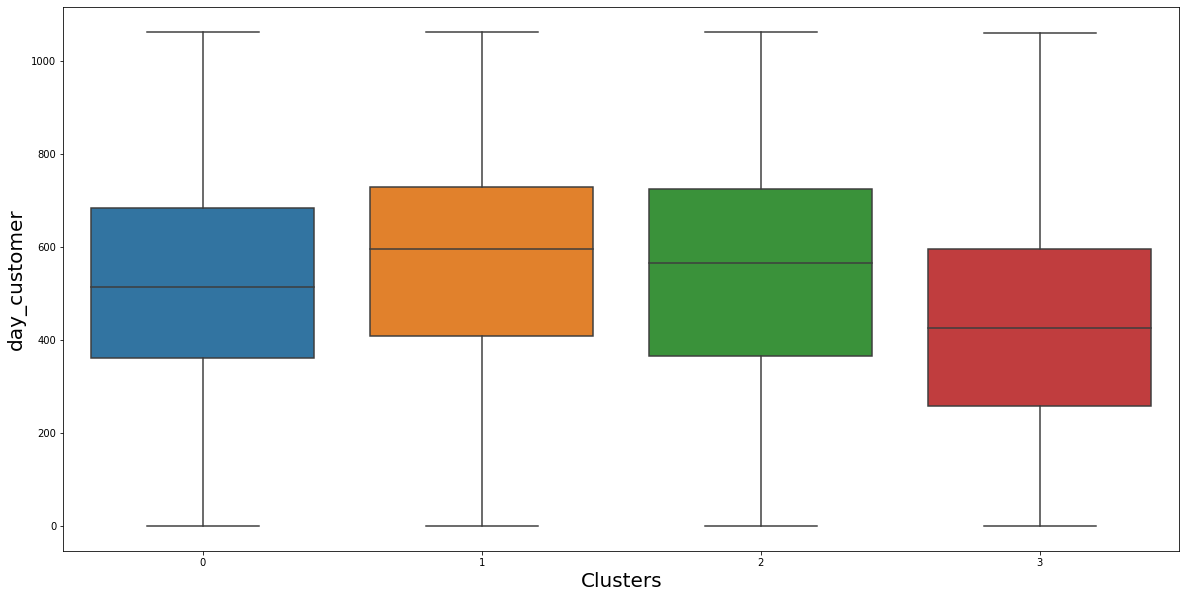

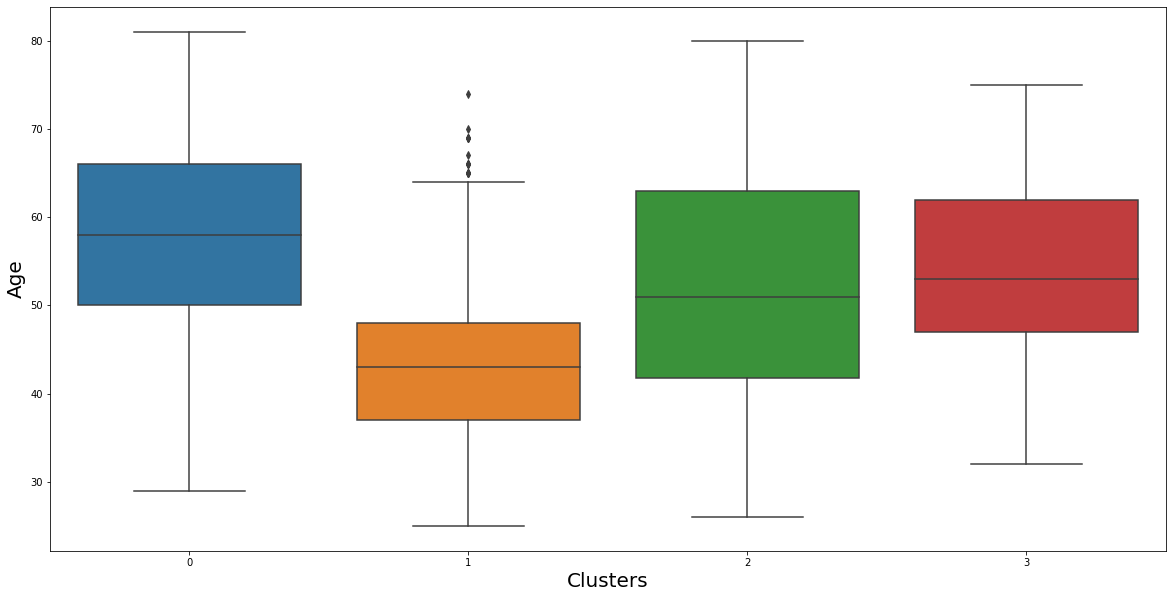

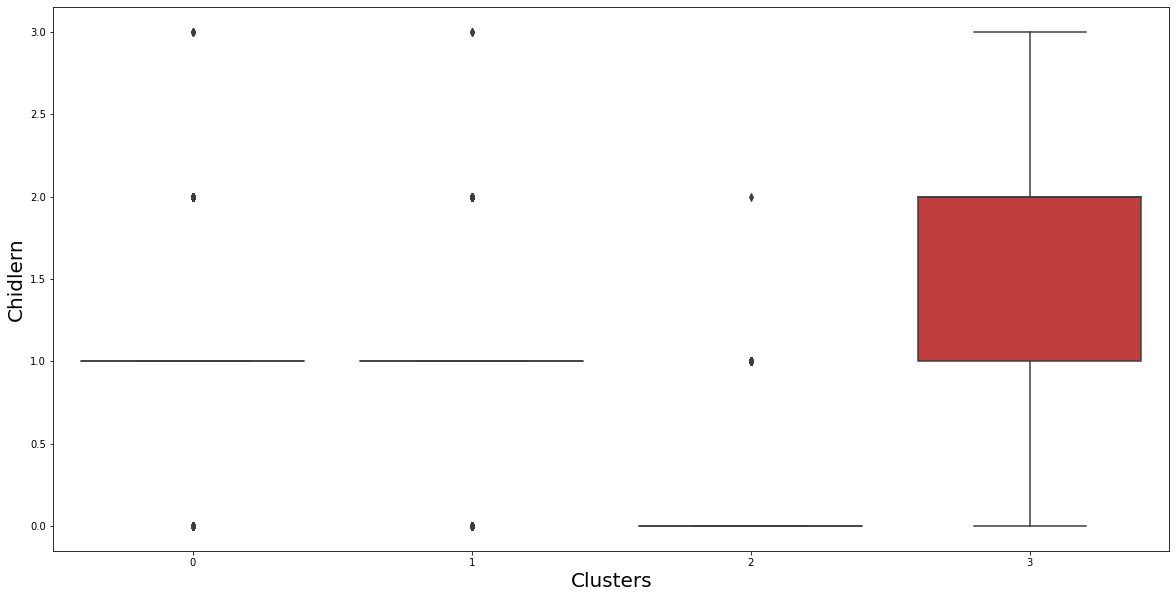

In [38]:
to_box = ['Income','Spent','day_customer','Age','Chidlern']
for i in to_box:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df, x='labels', y = i)
    plt.xlabel('Clusters',fontsize=20)
    plt.ylabel(i,fontsize=20)
    



* Spending Habits by Clusters

<Figure size 2160x1080 with 0 Axes>

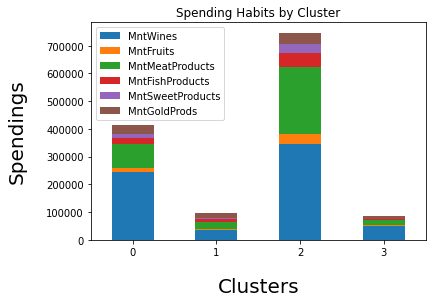

In [39]:

cluster_spendings = df.groupby('labels')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Insights: Customers from all the segments have spent most of their money on Wine and Meat products

* Purchasing Habits by Clusters

<Figure size 2160x1080 with 0 Axes>

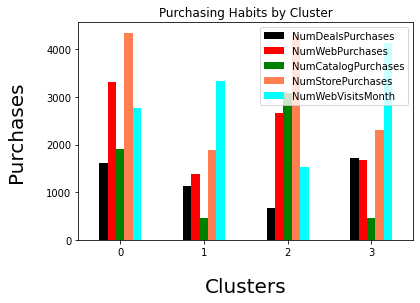

In [40]:

cluster_purchases = df.groupby('labels')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

Insights:

group 1 and group 3 Customers mostly likely to do store purchasing

Most of the web and catalog purchases are also done by the customers from group 1 and group 3 
segments

Deal purchases are common among the group 1 and group 2 customers

Group 2 category customers made the most number of web visits while customers from group 3 segment have least web visits

* Promotions Acceptance by Clusters

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

<Figure size 2160x1080 with 0 Axes>

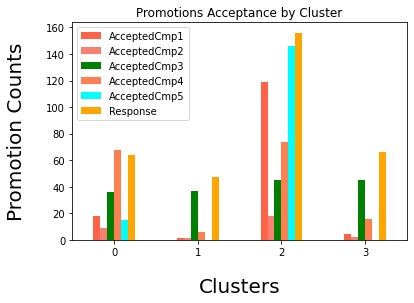

In [41]:
cluster_campaign = df.groupby('labels')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center')

Insights:

Group 3 customers accepted the most of the offers from the comapany

Compaign 1, 5 and final one seems to be the most successful one's

Group 0 category showed the least interest in the promotion campaings of the company